In [671]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import SelectKBest,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LassoCV,Lasso

import pickle
import warnings
warnings.filterwarnings('ignore')

In [661]:
baseball = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## EDA

In [662]:
baseball.shape

(30, 17)

The shape of our dataset is (30,17)

In [663]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Describtion of the dataset.
- Count.
- Mean.
- Standard deviation.
- Mininum
- 1st Quantile (25%)
- 2nd Quantile (50%)
- 3rd Quantile (75%)
- Maximum.

In [664]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Information of dataset. 
- Only int and float dtype columns are present.

In [665]:
baseball.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values present in our dataset.

## Visualisation.

**- Scatterplot.**

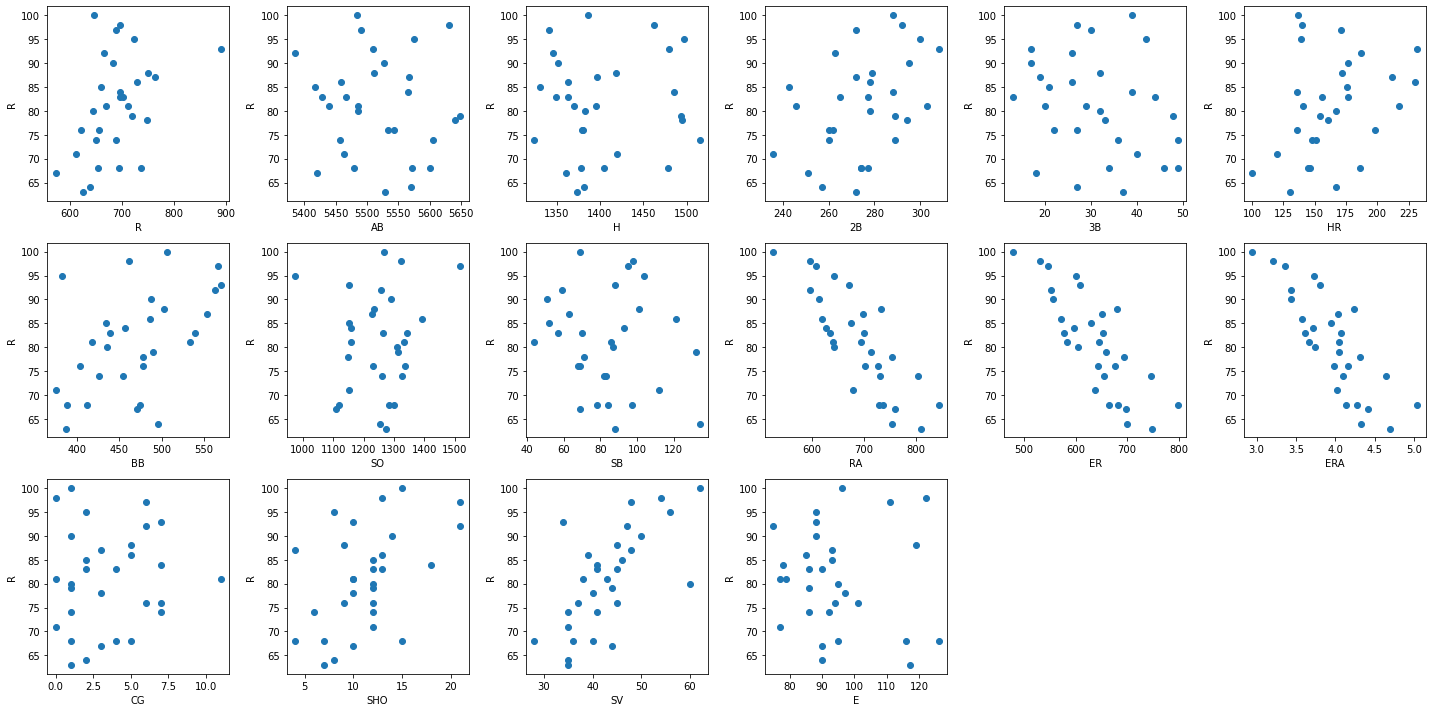

In [668]:
plt.figure(figsize=(20,10))
plotnumber = 1

for column in baseball.drop(columns = ['W'],axis =1):
    if plotnumber <= 18:
        ax = plt.subplot(3,6,plotnumber)
        plt.scatter(baseball.drop(columns = ['W'],axis =1)[column],baseball.W)
        plt.xlabel(column,fontsize = 10)
        plt.ylabel('R',fontsize=10)
    plotnumber += 1
plt.tight_layout()

Scatter Plot Between Independent and Dependent columns.

**- Normal Distribution.**

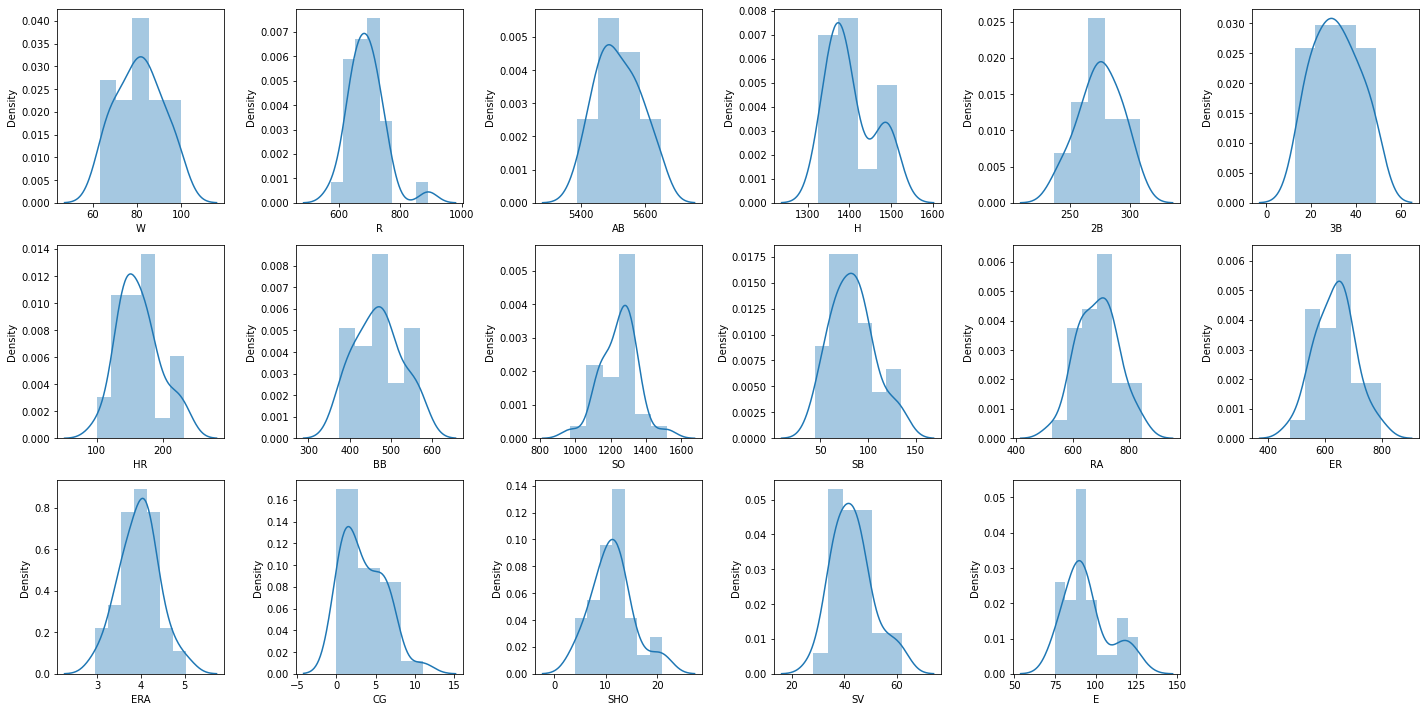

In [509]:
plt.figure(figsize=(20,10))
plotnumber = 1

for column in baseball:
    if plotnumber <= 18:
        ax = plt.subplot(3,6,plotnumber)
        sns.distplot(baseball[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

**- Outliers.**

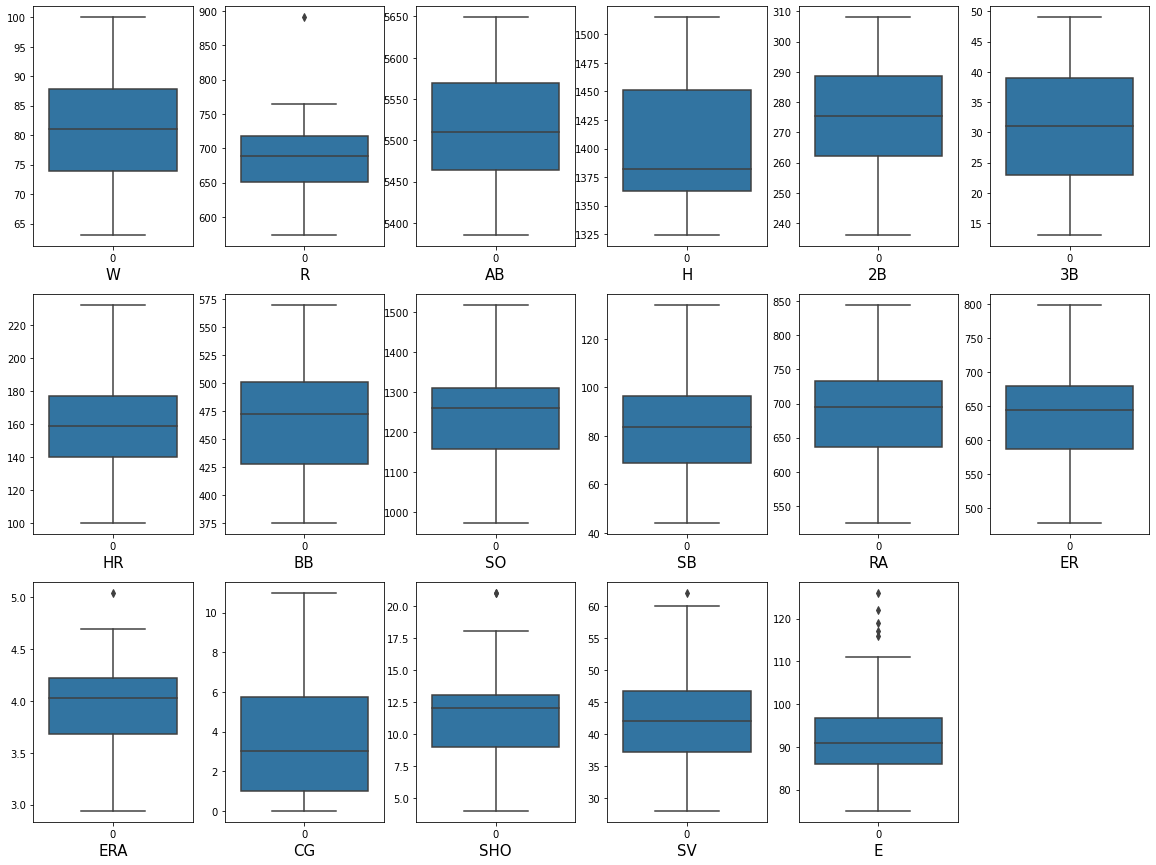

In [510]:
plt.figure(figsize = (20,15))
graph = 1
for column in baseball:
    if graph <= 18:
        plt.subplot(3,6,graph)
        ax = sns.boxplot(data = baseball[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

**- Removing Outliers.**

In [511]:
q1 = baseball.quantile(0.25)
q3 = baseball.quantile(0.75)
iqr = q3 - q1

In [512]:
r_high = (q3.R + (1.5 * iqr.R))
print(r_high)

index = np.where(baseball['R'] > r_high)
print(index)

baseball = baseball.drop(baseball.index[index])
print(baseball.shape)

baseball.reset_index()

818.75
(array([5]),)
(29, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [513]:
era_high = (q3.ERA + (1.5 * iqr.ERA))
print(era_high)

index = np.where(baseball['ERA'] > era_high)
print(index)

baseball = baseball.drop(baseball.index[index])
print(baseball.shape)

baseball.reset_index()

5.026250000000001
(array([28]),)
(28, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [514]:
sho_high = (q3.SHO + (1.5 * iqr.SHO))
print(sho_high)

index = np.where(baseball['SHO'] > sho_high)
print(index)

baseball = baseball.drop(baseball.index[index])
print(baseball.shape)

baseball.reset_index()

19.0
(array([16, 24]),)
(26, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [515]:
sv_high = (q3.SV + (1.5 * iqr.SV))
print(sv_high)

index = np.where(baseball['SV'] > sv_high)
print(index)

baseball = baseball.drop(baseball.index[index])
print(baseball.shape)

baseball.reset_index()

61.0
(array([14]),)
(25, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [516]:
e_high = (q3.E + (1.5 * iqr.E))
print(e_high)

index = np.where(baseball['E'] > e_high)
print(index)

baseball = baseball.drop(baseball.index[index])
print(baseball.shape)

baseball.reset_index()

112.875
(array([ 9, 13, 14, 15, 21]),)
(20, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


**- After Removing Outliers.**

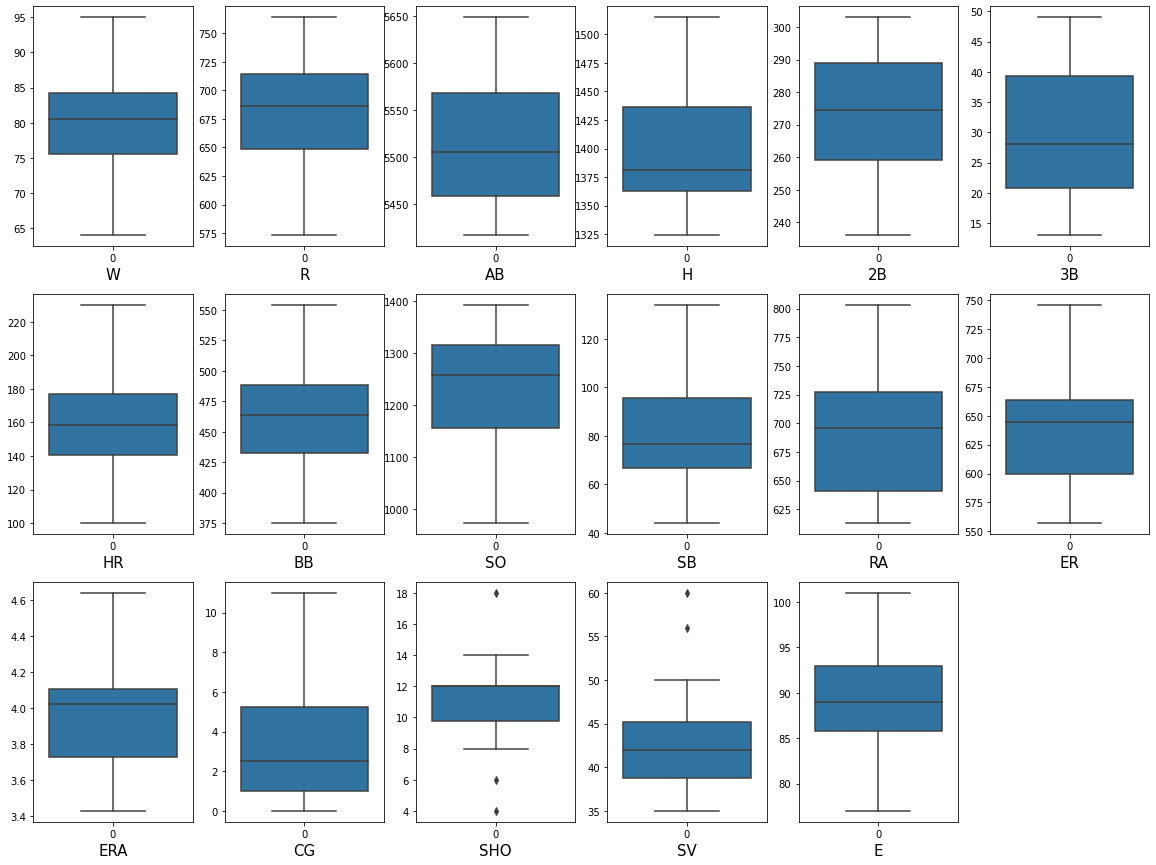

In [517]:
plt.figure(figsize = (20,15))
graph = 1
for column in baseball:
    if graph <= 18:
        plt.subplot(3,6,graph)
        ax = sns.boxplot(data = baseball[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

In [518]:
loss = (30-20)/30*100
print(loss,'%')

33.33333333333333 %


## Correlation. 

In [519]:
df_corr = baseball.corr().abs()
mask = np.triu(np.ones_like(baseball.corr()))

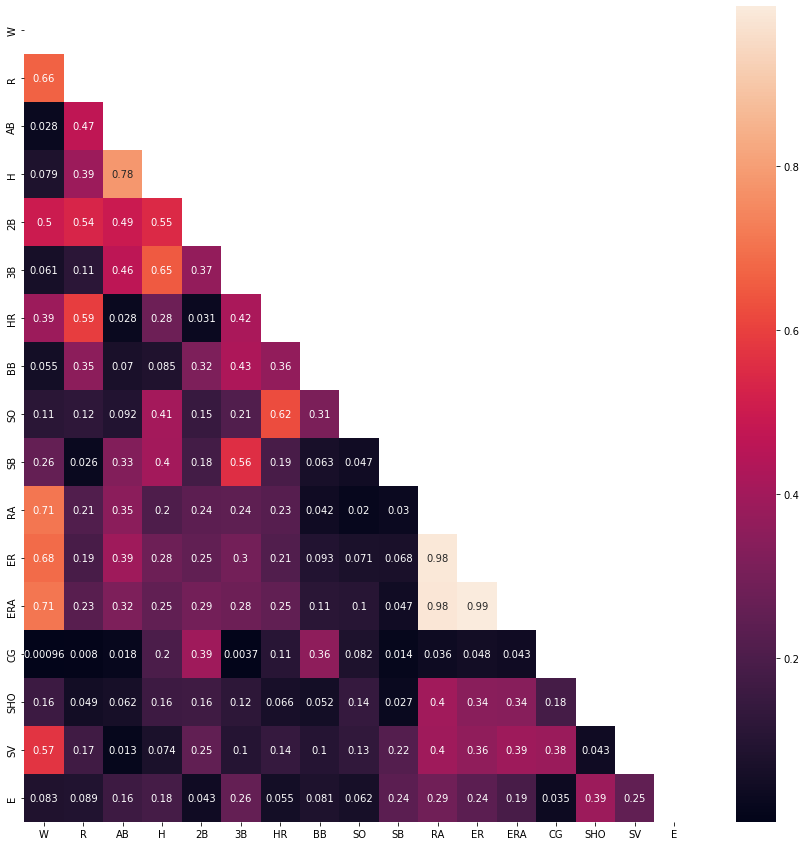

In [520]:
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True, mask = mask)
plt.show()

- RA,ER,ERA, are correlated columns, so we can use any one of them.
- They are 98% correlated with each other.

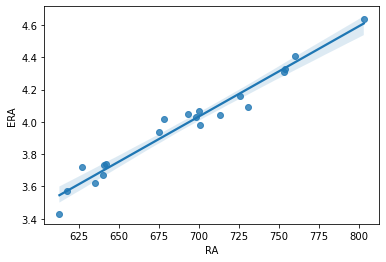

In [521]:
sns.regplot(baseball['RA'],baseball['ERA'])
plt.show()

- RA and ERA are highly correlated.

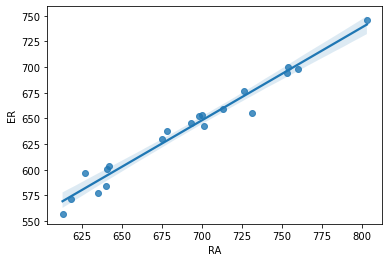

In [522]:
sns.regplot(baseball['RA'],baseball['ER'])
plt.show()

- RA and ER are highly correlated.

In [523]:
baseball.drop(columns = ['ERA','ER'],axis = 1,inplace = True)

In [524]:
baseball.shape

(20, 15)

**- Seperating the Independent and Dependent Columns.**

In [525]:
x = baseball.drop('W',axis = 1)
y = baseball.W

## Feature Selection.

In [526]:
best_feature = SelectKBest(score_func = f_classif, k =12)
fit = best_feature.fit(x,y)

In [527]:
brt_score = pd.DataFrame(fit.scores_)
brt_column = pd.DataFrame(x.columns)

In [528]:
#concate dataframe
feature_score = pd.concat([brt_column,brt_score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(12,'Scores')

,Feature Name,Scores
0,R,4.765857
13,E,4.080000
8,SB,3.415345
12,SV,2.912719
9,RA,2.026253
1,AB,1.816023
7,SO,1.769528
11,SHO,1.733913
5,HR,0.817083
2,H,0.739401


Selecting top 12 Columns.

## Final Dataset.

In [529]:
new_x = baseball[['R','E','SB','SV','RA','AB','SO','SHO']] 
new_x

,R,E,SB,SV,RA,AB,SO,SHO
0,724,88,104,56,641,5575,973,8
1,696,86,70,45,700,5467,1264,12
2,669,79,86,38,640,5439,1157,10
3,622,101,68,37,701,5533,1231,9
4,689,86,83,35,803,5605,1259,12
6,764,93,63,48,698,5567,1227,4
7,713,77,44,43,693,5485,1331,10
8,644,95,87,60,642,5485,1310,12
9,748,97,71,40,753,5640,1148,10
11,729,85,121,39,618,5459,1392,13


**- Using Standard scaler on features to scale the values.**

In [530]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(new_x)

**- Model Instantiating.**

In [531]:
lr = LinearRegression()
ada = AdaBoostRegressor()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()

**- Creating The function for the training,testing score and graph, so that, we can get the results just by calling the function.**

In [584]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))

In [600]:
def graph(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual VS Prediction")
    plt.show()

## Training the Model

**Linear Regression Model**

In [613]:
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = i, test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test) 
    if round(metrics.r2_score(y_test,pred_test)*100,1) >= 80:
        print('At Random state:',i)
        print('Training score :',round(metrics.r2_score(y_train,pred_train)*100,1))
        print('Testing score:',round(metrics.r2_score(y_test,pred_test)*100,1))

At Random state: 14
Training score : 90.9
Testing score: 85.9
At Random state: 20
Training score : 91.5
Testing score: 83.9
At Random state: 28
Training score : 91.0
Testing score: 82.2
At Random state: 35
Training score : 88.9
Testing score: 90.3
At Random state: 44
Training score : 91.1
Testing score: 85.0
At Random state: 60
Training score : 90.7
Testing score: 80.4
At Random state: 61
Training score : 89.4
Testing score: 89.5
At Random state: 68
Training score : 89.5
Testing score: 94.8
At Random state: 80
Training score : 89.1
Testing score: 89.5
At Random state: 90
Training score : 87.8
Testing score: 87.4
At Random state: 95
Training score : 90.5
Testing score: 80.2
At Random state: 102
Training score : 89.8
Testing score: 89.8
At Random state: 108
Training score : 91.3
Testing score: 81.8
At Random state: 121
Training score : 90.2
Testing score: 91.9
At Random state: 124
Training score : 87.9
Testing score: 81.2
At Random state: 138
Training score : 91.0
Testing score: 83.4
At 

**- Train Test Split.**

In [642]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 194)

In [643]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9087923854152085

 ----- Test Result ----- 

R2 Score: 0.8910195916741632


**- Model's Prediction.**

In [644]:
y_pred = lr.predict(x_test)
y_pred

array([85.35751629, 75.20849073, 83.43148622, 72.50255227])

**- Model's Graph.**

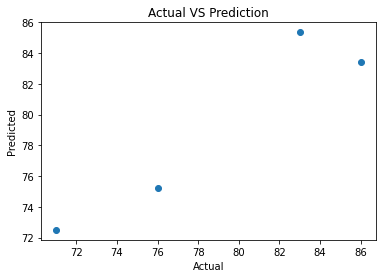

In [645]:
graph(y_test,y_pred)

**AdaBoost Regressor Model.**

In [551]:
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = i, test_size = 0.20)
    ada.fit(x_train,y_train)
    pred_train = ada.predict(x_train)
    pred_test = ada.predict(x_test) 
    if round(metrics.r2_score(y_test,pred_test)*100,1) >= 70:
        print('At Random state:',i)
        print('Training score :',round(metrics.r2_score(y_train,pred_train)*100,1))
        print('Testing scoredd:',round(metrics.r2_score(y_test,pred_test)*100,1))

At Random state: 49
Training score : 99.3
Testing score: 74.3
At Random state: 133
Training score : 99.3
Testing score: 70.4
At Random state: 240
Training score : 99.7
Testing score: 73.2
At Random state: 264
Training score : 99.6
Testing score: 78.4
At Random state: 320
Training score : 98.8
Testing score: 75.4
At Random state: 352
Training score : 99.0
Testing score: 78.9
At Random state: 376
Training score : 99.1
Testing score: 77.3
At Random state: 435
Training score : 99.5
Testing score: 80.7


**- Train Test Split.**

In [566]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 352)

In [567]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9923230555555556

 ----- Test Result ----- 

R2 Score: 0.8003257887517151


**- Model's Prediction.**

In [605]:
y_pred = ada.predict(x_test)
y_pred

array([77.33333333, 84.        , 81.25      , 76.        ])

**- Model's Graph.**

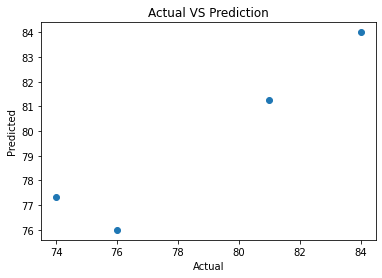

In [606]:
graph(y_test, y_pred)

**RandomForest Regressor Model**

In [581]:
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = i, test_size = 0.20)
    rf.fit(x_train,y_train)
    pred_train = rf.predict(x_train)
    pred_test = rf.predict(x_test) 
    if round(metrics.r2_score(y_test,pred_test)*100,1) >= 80:
        print('At Random state:',i)
        print('Training score :',round(metrics.r2_score(y_train,pred_train)*100,1))
        print('Testing scoredd:',round(metrics.r2_score(y_test,pred_test)*100,1))

At Random state: 38
Training score : 91.5
Testing scoredd: 85.0
At Random state: 64
Training score : 90.1
Testing scoredd: 88.4
At Random state: 71
Training score : 92.0
Testing scoredd: 83.9
At Random state: 141
Training score : 92.7
Testing scoredd: 82.9
At Random state: 168
Training score : 93.6
Testing scoredd: 85.6
At Random state: 240
Training score : 92.5
Testing scoredd: 88.3
At Random state: 264
Training score : 90.5
Testing scoredd: 80.3
At Random state: 326
Training score : 93.3
Testing scoredd: 86.2
At Random state: 331
Training score : 92.2
Testing scoredd: 84.2
At Random state: 338
Training score : 92.6
Testing scoredd: 88.8
At Random state: 352
Training score : 90.8
Testing scoredd: 82.5
At Random state: 435
Training score : 92.9
Testing scoredd: 86.1
At Random state: 483
Training score : 93.1
Testing scoredd: 81.5


**- Train Test Split.**

In [585]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 338)

In [586]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9179844953911606

 ----- Test Result ----- 

R2 Score: 0.8671777777777768


**- Model's Prediction.**

In [607]:
y_pred = rf.predict(x_test)
y_pred

array([74.26, 84.2 , 80.76, 76.08])

**- Model's Graph.**

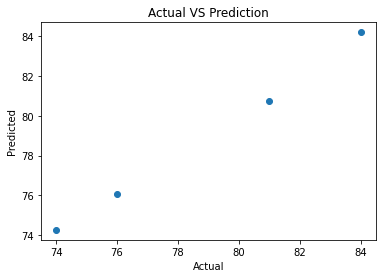

In [608]:
graph(y_test,y_pred)

**KNeighbors Regressor Model.**

In [587]:
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = i, test_size = 0.20)
    knn.fit(x_train,y_train)
    pred_train = knn.predict(x_train)
    pred_test = knn.predict(x_test) 
    if round(metrics.r2_score(y_test,pred_test)*100,1) >= 80:
        print('At Random state:',i)
        print('Training score :',round(metrics.r2_score(y_train,pred_train)*100,1))
        print('Testing scoredd:',round(metrics.r2_score(y_test,pred_test)*100,1))

At Random state: 43
Training score : 49.7
Testing scoredd: 85.4
At Random state: 49
Training score : 49.7
Testing scoredd: 85.4
At Random state: 55
Training score : 57.7
Testing scoredd: 90.6
At Random state: 86
Training score : 55.2
Testing scoredd: 84.4
At Random state: 186
Training score : 58.7
Testing scoredd: 86.0
At Random state: 187
Training score : 60.8
Testing scoredd: 81.9
At Random state: 216
Training score : 60.5
Testing scoredd: 85.1
At Random state: 219
Training score : 59.3
Testing scoredd: 83.0
At Random state: 313
Training score : 61.7
Testing scoredd: 85.1
At Random state: 320
Training score : 58.2
Testing scoredd: 84.8
At Random state: 326
Training score : 61.8
Testing scoredd: 87.3
At Random state: 331
Training score : 56.6
Testing scoredd: 94.4
At Random state: 349
Training score : 57.6
Testing scoredd: 84.2
At Random state: 361
Training score : 58.0
Testing scoredd: 82.8
At Random state: 395
Training score : 60.4
Testing scoredd: 88.6
At Random state: 470
Training

**- Train Test Split.**

In [588]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 470)

In [589]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.6036334583000428

 ----- Test Result ----- 

R2 Score: 0.888446215139442


**- Model's Prediction.**

In [609]:
y_pred = knn.predict(x_test)
y_pred

array([75. , 81.8, 80.6, 75. ])

**- Model's Graph.**

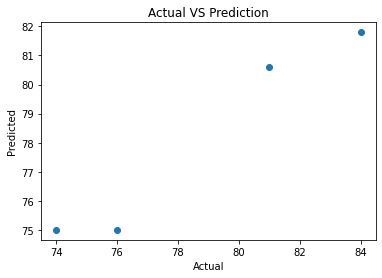

In [610]:
graph(y_test,y_pred)

## Model Evaluation.

In [676]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 102)

In [677]:
lasscv = LassoCV(alphas=None, max_iter=100, normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [678]:
alpha = lasscv.alpha_

In [679]:
lasso = Lasso(alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=0.3779609988532359)

In [680]:
lasso.fit(x_test,y_test)

Lasso(alpha=0.3779609988532359)

                Out of all models Linear Regression Model is giving the best accuracy Score.

In [681]:
filename = 'baseball.pickle'
pickle.dump(lr, open(filename, 'wb'))